# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Statistics :https://onlinecourses.science.psu.edu/stat500/node/68
+ Python : http://www.scipy-lectures.org/packages/statistics/index.html
****

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.shape

(130, 3)

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

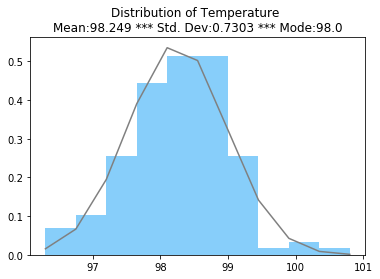

In [49]:
temp_obs = df.temperature.sort_values()
plt.hist(df.temperature, 10, normed=1, color='lightskyblue')
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='gray')
plt.title(('Distribution of Temperature \nMean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(sigma)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))
plt.show()

In [14]:
from scipy.stats import norm
import scipy.stats

In [15]:
p=scipy.stats.normaltest(temp_obs)
p

NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)

# Q1. Is the distribution of body temperatures normal? 

# Q2.Is the sample size large? Are the observations independent? 

# Q3.Is the true population mean really 98.6 degrees F? 
•H0: population mean = 98.6 

•HL: population mean < 96.8

In [18]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [23]:
from scipy import stats
stats.ttest_1samp(df.temperature,98.6)   

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# Q4.Draw a small sample of size 10 from the data and repeat both tests. 

In [31]:
import numpy as np
n = 10 #size of the sample you want
random_10=np.random.choice(df.temperature,n)
print(random_10)

[ 98.8  98.6  98.   98.6  98.6  98.   97.1  96.9  98.6  98.7]


In [32]:
ztest(random_10,value=98.6)

(-1.8914125608988217, 0.058569293125733647)

In [33]:
stats.ttest_1samp(random_10,98.6)  

Ttest_1sampResult(statistic=-1.8914125608988221, pvalue=0.091130348912134757)

# Q5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [34]:
se = sigma/np.sqrt(len(df))
margin_error = 1.96*se
confidence_interval = [mu-margin_error,mu+margin_error]
confidence_interval

[98.123679804428193, 98.374781734033363]

# Q6. Is there a significant difference between males and females in normal temperature? 

In [37]:
female_sample = np.array(df.temperature[df.gender=='F']) 
male_sample = np.array(df.temperature[df.gender=='M'])
print(len(female_sample))
print(len(male_sample))

65
65


Hypothesis testing: 
•H0: muM - muF = 0 
•HL: muM - muF > or < 0 

In [38]:
stats.ttest_ind(female_sample,male_sample)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

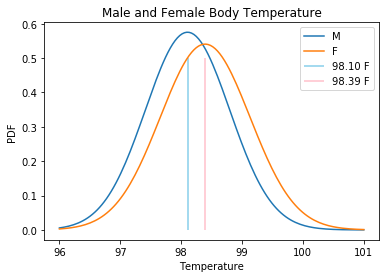

In [58]:
##Visualication-Normal Distribution graph of Male and Female Temperatures
import pylab
f_mean=female_sample.mean()
m_mean=male_sample.mean()
f_std=female_sample.std()
m_std=male_sample.std()
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=m_mean, scale=m_std)    
pylab.plot(x,y1)
y2 = stats.norm.pdf(x, loc=f_mean, scale=f_std)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(m_mean,0, 0.5, color='skyblue')
pylab.vlines(f_mean,0, 0.5, color='pink')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()